In [42]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
bikes = pd.read_csv('fordgobike_master.csv')

In [3]:
bikes.head()

,rideable_type,started_at,ended_at,member_casual,weekday,duration,distance_km
0,electric_bike,2020-07-31 17:36:17,2020-07-31 17:48:13,casual,Friday,11.933333,2.115477
1,electric_bike,2020-07-31 19:42:50,2020-07-31 19:49:54,casual,Friday,7.066667,0.002209
2,electric_bike,2020-07-31 17:18:46,2020-07-31 17:36:31,casual,Friday,17.750000,3.106870
3,electric_bike,2020-07-31 20:48:47,2020-07-31 21:05:04,casual,Friday,16.283333,2.474800
4,electric_bike,2020-07-31 20:18:24,2020-07-31 20:24:26,casual,Friday,6.033333,0.684872


In [4]:
bikes.describe()

,duration,distance_km
count,154956.000000,154760.000000
mean,24.866365,2.062793
std,266.135921,1.676028
min,0.000000,0.000000
25%,7.333333,0.879325
50%,12.966667,1.751174
75%,22.633333,2.888888
max,27030.966667,17.760470


## Univariate Exploration

### How is  distance in kilometers  distributed

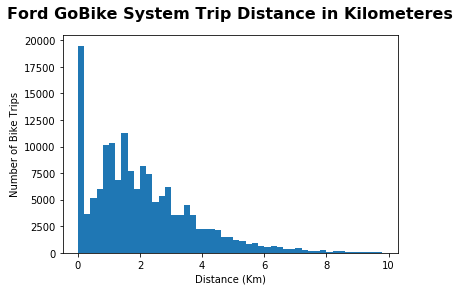

In [5]:
bin_edges = np.arange(0,10,0.2)
plt.hist(data = bikes, x = 'distance_km',bins = bin_edges);
plt.title("Ford GoBike System Trip Distance in Kilometeres", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (Km)')
plt.ylabel('Number of Bike Trips');


##### The distance is rightly skewed having a mean at 2.4km the lower distance has higher number of trips

### How is the duration distributed in minutes

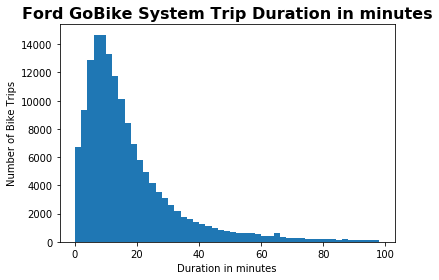

In [6]:
bin_edges = np.arange(0,100,2)
plt.hist(data = bikes, x = 'duration',bins = bin_edges);
plt.title("Ford GoBike System Trip Duration in minutes", y=1.0, fontsize=16, fontweight='bold')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of Bike Trips');


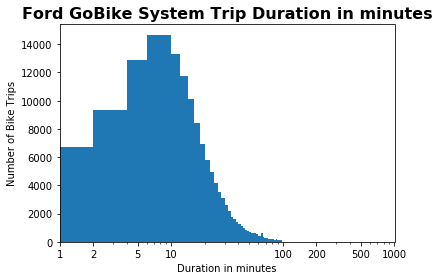

In [7]:
bin_edges = np.arange(0,100,2)
plt.hist(data = bikes, x = 'duration',bins = bin_edges);
plt.title("Ford GoBike System Trip Duration in minutes", y=1.0, fontsize=16, fontweight='bold')
locx = [1, 2, 5, 10, 100, 200, 500, 1000] 
labelx = ['{}'.format(val) for val in locx]
plt.xlabel('Duration in minutes')
plt.ylabel('Number of Bike Trips');
plt.xscale('log')
plt.xticks(locx, labelx);

### How are weekdays distributed

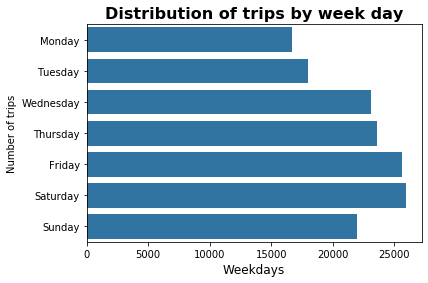

In [8]:
orderby = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
color = sb.color_palette()[0]
sb.countplot(data = bikes, y = 'weekday', color = color,order = orderby)
plt.title('Distribution of trips by week day',y=1.0, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays', fontsize = 12)
plt.ylabel('Number of trips');

#### From the distribution above friday and saturday has the highest number of trips while Monday has the least number of distribution

### How is the bike type distributed

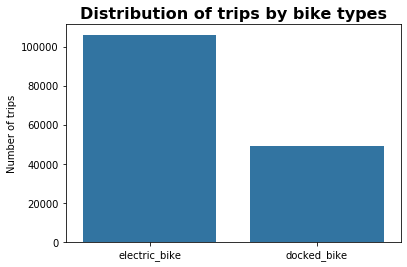

In [9]:
color = sb.color_palette()[0]

sb.countplot(data = bikes, x = 'rideable_type', color = color)
plt.title('Distribution of trips by bike types',y=1.0, fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Number of trips');


#### From the distribution above,electric bikes are used more often than docked bikes

### How are users  distributed?

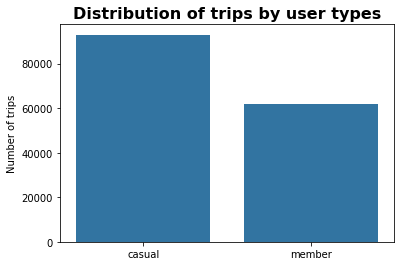

In [10]:
color = sb.color_palette()[0]

sb.countplot(data = bikes, x = 'member_casual', color = color)
plt.title('Distribution of trips by user types',y=1.0, fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Number of trips');


#### From the distribution above, casual users go on more trips than member users.

## Bivariate exploration

### Which bike type is used for longer distance?

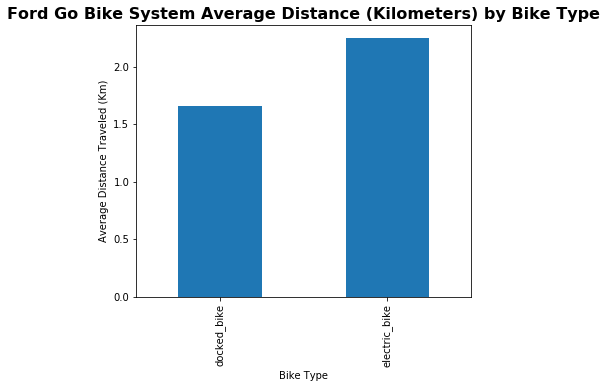

In [11]:

plt = bikes.groupby('rideable_type')['distance_km'].mean().plot(kind='bar', figsize=(6,5));

plt.set_title('Ford Go Bike System Average Distance (Kilometers) by Bike Type', y=1.0, fontsize=16, fontweight='bold')
plt.set_xlabel('Bike Type')
plt.set_ylabel('Average Distance Traveled (Km)');

#### From the above observation, docked_type bikes are used for longer distance

### what is the most preffered distance for users

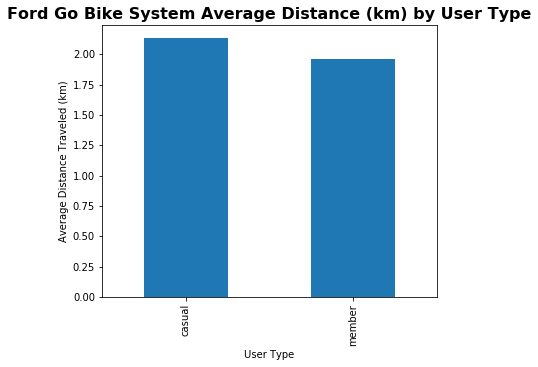

In [12]:
plt = bikes.groupby('member_casual')['distance_km'].mean().plot(kind='bar', figsize=(6,5));

plt.set_title('Ford Go Bike System Average Distance (km) by User Type', y=1.00, fontsize=16, fontweight='bold')
plt.set_xlabel('User Type')
plt.set_ylabel('Average Distance Traveled (km)');

#### Casual users take longer trips than members do

### What day of the week takes longer time?

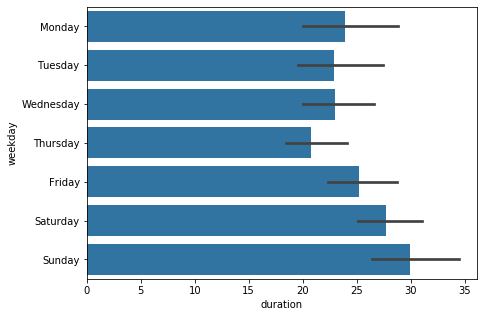

In [18]:

plt.figure(figsize = [7, 5])
sb.barplot(data=bikes, y='weekday', x='duration', color=color,order = orderby);


#### Sunday's trips take longer time followed directly by saturday's trips.Thursday has the least average duration for trips and it does not have the least number of trips from our univariante observation.further investigation will be carried out on this.

### What day of the week takes longer distance?

<Figure size 720x576 with 0 Axes>

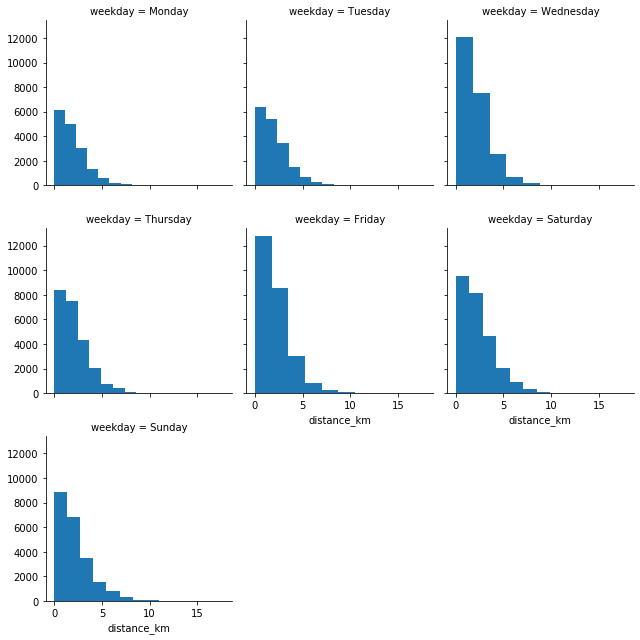

In [19]:
#
plt.figure(figsize = [10, 8])

g = sb.FacetGrid(data = bikes, col = 'weekday',col_wrap = 3,col_order = orderby);
g.map(plt.hist, "distance_km");
#plt.subplot(1, 2, 1)
#box1 = sb.violinplot(data = bikes, y = 'weekday', x = 'distance_km',color = color,order = orderby, inner = None);

#plt.subplot(1,2,2)
#sb.countplot(data = bikes, hue = 'weekday', x = 'distance_km',color = color,order = orderby);
#plt.ylim(box1.get_ylim())


### which bike type  is faster?

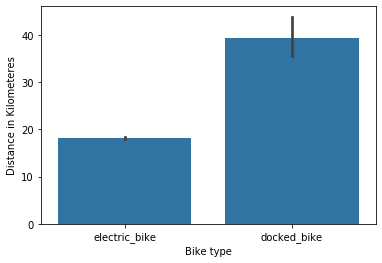

In [20]:

sb.barplot(data=bikes, x='rideable_type', y='duration', color=color);
plt.xlabel('Bike type');
plt.ylabel('Duration in minutes');

####  Electric bike is faster than docked bike 

### The relationship between duration and distance_km

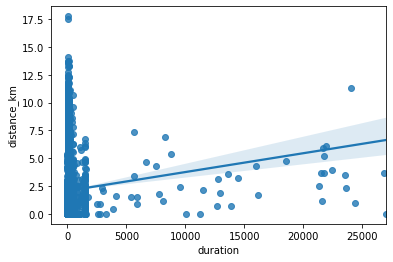

In [21]:
sb.regplot(data = bikes, x = 'duration', y = 'distance_km');

In [22]:
bikes.corr()['duration']

duration       1.000000
distance_km    0.026675
Name: duration, dtype: float64

#### From the above,in as much as there are numerous outliers in the duration variables. Also there is very little correlation between duration and distance variables.

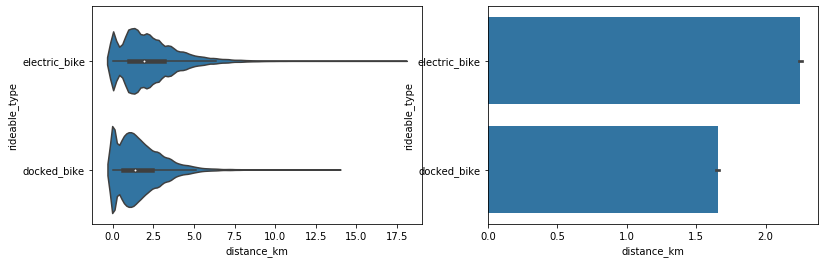

In [23]:


plt.subplot(1, 2, 1)
sb.violinplot(data = bikes, y = 'rideable_type', x = 'distance_km' , color = color);

plt.subplot(1,2,2)
sb.barplot(data = bikes, y = 'rideable_type', x = 'distance_km',color = color);
#plt.ylim(box1.get_ylim())


#### There are a lot of outliers,electric bike is used for longer distances 


## Multivariate exploration

### How does duration vary accross weekdays in respect to bike type selection?

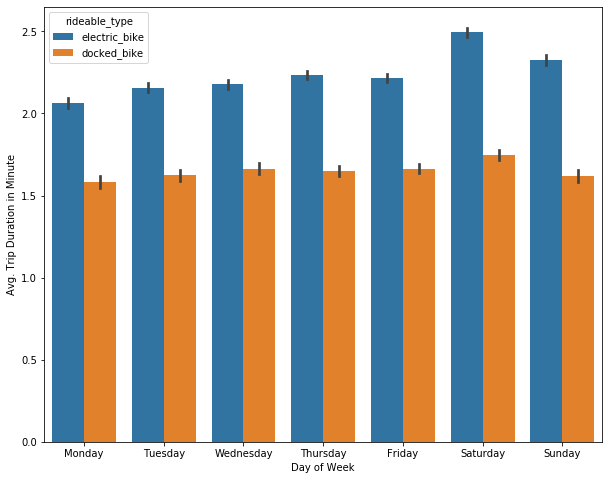

In [32]:
plt.figure(figsize = [10, 8])
sb.barplot(data=bikes, x='weekday', y='distance_km', hue='rideable_type', dodge=0.3,order = orderby);
plt.xlabel('Day of Week');
plt.ylabel('Avg. distance in Minute');

#### It is concluded that electric bikes are used for longer trips since they are faster,
#### The distance for docked bikes are almost the same accross the weekdays
#### The trip distance demands during the weekends are also more compared to weekdays

### What bike types do customers prefer in respect to duration

C:\Users\ASHAROX\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ASHAROX\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


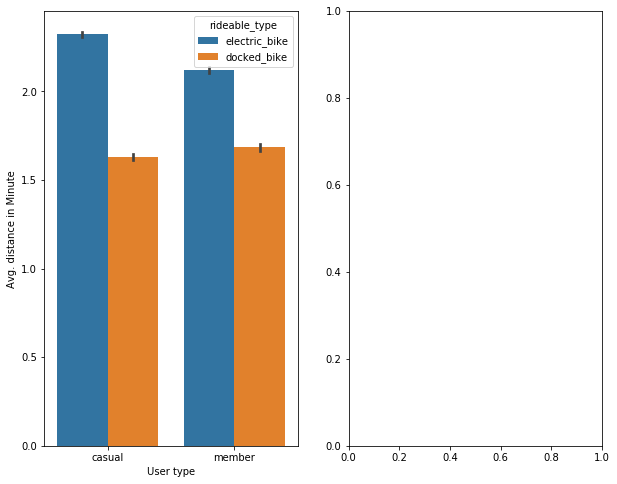

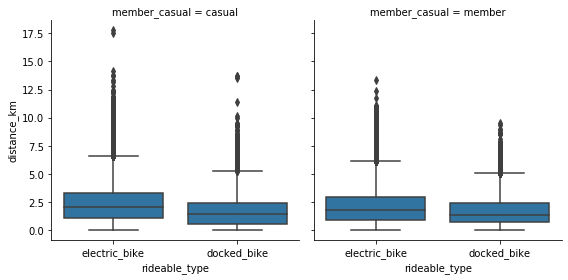

In [51]:
plt.figure(figsize = [10, 8])
plt.subplot(1, 2, 1)
sb.barplot(data=bikes, x='member_casual', y="distance_km", hue="rideable_type");
plt.xlabel('User type');
plt.ylabel('Avg. duration in kilometers');

plt.subplot(1,2,2)
g = sb.FacetGrid(data = bikes, col = 'member_casual', size = 4)
g.map(sb.boxplot, 'rideable_type', 'distance_km')

#### From the above visualization,it is concluded that members use electric bikes  more for longer distances since they are faster.

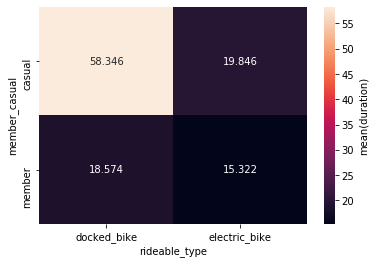

In [53]:
 = bikes.groupby(['rideable_type', 'member_casual']).mean()['duration']
cat_means = cat_means.reset_index(name = 'duration_avg')
cat_means = cat_means.pivot(index = 'member_casual', columns = 'rideable_type',
                            values = 'duration_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration)'})